# Анализ рынка компьютерных игр

Интернет-магазине продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й.

**Описание данных**

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span><ul class="toc-item"><li><span><a href="#Считаем-CSV-файл-с-данными-с-помощью-библиотеки-pandas-и-сохраним-его-в-датафрейм" data-toc-modified-id="Считаем-CSV-файл-с-данными-с-помощью-библиотеки-pandas-и-сохраним-его-в-датафрейм-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм</a></span></li><li><span><a href="#Выведим-первые-строки-каждого-набора-данных.-Изучим-общую-информацию-о-каждом-датафрейме." data-toc-modified-id="Выведим-первые-строки-каждого-набора-данных.-Изучим-общую-информацию-о-каждом-датафрейме.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.</a></span></li></ul></li><li><span><a href="#Выполним-предобработку-данных" data-toc-modified-id="Выполним-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выполним предобработку данных</a></span><ul class="toc-item"><li><span><a href="#Приведём-названия-столбцов-к-нижнему-регистру" data-toc-modified-id="Приведём-названия-столбцов-к-нижнему-регистру-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведём названия столбцов к нижнему регистру</a></span></li><li><span><a href="#Удалим-неявные-дубликаты" data-toc-modified-id="Удалим-неявные-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удалим неявные дубликаты</a></span></li><li><span><a href="#Преобразуем-данные-в-нужные-типы" data-toc-modified-id="Преобразуем-данные-в-нужные-типы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразуем данные в нужные типы</a></span></li><li><span><a href="#Обработаем-пропуски" data-toc-modified-id="Обработаем-пропуски-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработаем пропуски</a></span></li><li><span><a href="#Посчитаем-суммарные-продажи-во-всех-регионах-и-запишим-их-в-отдельный-столбец" data-toc-modified-id="Посчитаем-суммарные-продажи-во-всех-регионах-и-запишим-их-в-отдельный-столбец-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец</a></span></li></ul></li><li><span><a href="#Выполним-исследовательский-анализ-данных" data-toc-modified-id="Выполним-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выполним исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-игр-выпускалось-в-разные-годы" data-toc-modified-id="Сколько-игр-выпускалось-в-разные-годы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько игр выпускалось в разные годы</a></span></li><li><span><a href="#Как-менялись-продажи-по-платформам" data-toc-modified-id="Как-менялись-продажи-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Как менялись продажи по платформам</a></span></li><li><span><a href="#Возьмём-данные-за-актуальный-период" data-toc-modified-id="Возьмём-данные-за-актуальный-период-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Возьмём данные за актуальный период</a></span></li><li><span><a href="#Какие-платформы-лидируют-по-продажам,-растут-или-падают?" data-toc-modified-id="Какие-платформы-лидируют-по-продажам,-растут-или-падают?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Какие платформы лидируют по продажам, растут или падают?</a></span></li><li><span><a href="#Построим-график-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам." data-toc-modified-id="Построим-график-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.</a></span></li><li><span><a href="#Как-влияют-на-продажи-внутри-одной-популярной-платформы-отзывы-пользователей-и-критиков?" data-toc-modified-id="Как-влияют-на-продажи-внутри-одной-популярной-платформы-отзывы-пользователей-и-критиков?-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?</a></span></li><li><span><a href="#Соотнесём-выводы-с-продажами-игр-на-других-платформах." data-toc-modified-id="Соотнесём-выводы-с-продажами-игр-на-других-платформах.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Соотнесём выводы с продажами игр на других платформах.</a></span></li><li><span><a href="#Посмотрим-на-общее-распределение-игр-по-жанрам.-Какие-самые-прибыльные-жанры?-Выделяются-ли-жанры-с-высокими-и-низкими-продажами?" data-toc-modified-id="Посмотрим-на-общее-распределение-игр-по-жанрам.-Какие-самые-прибыльные-жанры?-Выделяются-ли-жанры-с-высокими-и-низкими-продажами?-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Посмотрим на общее распределение игр по жанрам. Какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?</a></span></li></ul></li><li><span><a href="#Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверим гипотезы</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные." data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from IPython.display import display_html

sns.set_style("darkgrid")

## Откроем файл с данными и изучим общую информацию

### Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм

Датафрейм из файла, расположенного по следующему пути: `/datasets/games.csv` сохраним в переменную `df`

In [164]:
df = pd.read_csv('/datasets/games.csv')

### Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

Исходный датафрейм

In [165]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о датафрейме

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем количество пропущенных значений для каждого столбца

In [167]:
df.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

Выведем долю пропущенных значений для каждого столбца

In [168]:
df.isna().mean().sort_values(ascending=False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

Количество явных дубликатов в датафрейме

In [169]:
df.duplicated().sum()

0

Проведём проверку неявных дубликатов по имени, платформе и году релиза  одновременно

In [170]:
duplicates = df[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

if duplicates.empty:
    print('Неявных дубликатов не найдено')
else:
    print('Обнаружены неявные дубликаты:')
    display(duplicates)

Обнаружены неявные дубликаты:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Описательная статистика

In [171]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Список платформ

In [172]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Список жанров

In [173]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Вывод**
* Датафрейм содержит: 16715 строк
* Названия столбцов содержат буквы в разных регистрах, на этапе предобработки данных приведём их к нижнему регистру
* Данные в столбце `Year_of_Release` на этапе предобработки данных необходимо привести к целочисленному типу
* Присутствуют пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`
* Присутствуют неявные дубликаты, удалим их на этапе предобработки данных
* У нас присутствуют данные об играх выпущенных с 1980 по 2016 годы

## Выполним предобработку данных

### Приведём названия столбцов к нижнему регистру

In [174]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведём названия к нижнему регистру

In [175]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Удалим неявные дубликаты

In [176]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

Проверим отсутствие неявных дубликатов

In [177]:
duplicates = df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

if duplicates.empty:
    print('Неявных дубликатов не найдено')
else:
    print('Обнаружены неявные дубликаты:')
    display(duplicates)


Неявных дубликатов не найдено


### Преобразуем данные в нужные типы

Преобразуем данные в столбце `year_of_release` в целочисленны тип

In [178]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

В столбце `user_score` присутствует значение - tbd, которое означает «To Be Determined» (будет определено позже), т. е. оценка отсутствует, заменим его на NaN

In [179]:
df['user_score'] = df['user_score'].replace('tbd', float('nan'))

Преобразуем данные в столбце `user_score` в вещественный тип

In [180]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


* В столбце `year_of_release` преобразовали данные в целочисленные для удобства восприятия
* В столбце `user_score` у части игр присутствовало значение - tbd, которое означает «To Be Determined» (будет определено позже), т. е. оценка отсутствует, поэтому мы заменили его на NaN. Преобразовали данные в вещественный тип для возможности применения к ним математических операций

### Обработаем пропуски

Посмотрим какие значения есть в столбце `rating`

In [182]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполним пропущенные данные в этом столбце значением  `no_ESRB`

In [183]:
df['rating'] = df['rating'].fillna('no_ESRB')

В названиях игр присутствует всего 2 пропуска, удалим эти значения

In [184]:
df.dropna(subset=['name'], inplace=True)

В годе релиза присутствует около 1.6% пропусков, удалим эти значения

In [185]:
df.dropna(subset=['year_of_release'], inplace=True)

Проверим снова наличие пропусков

In [186]:
df.isna().mean().sort_values(ascending=False)

user_score         0.546190
critic_score       0.514565
name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
rating             0.000000
dtype: float64

In [187]:
df[(df['critic_score'].isna()) & (df['user_score'].isna()) &
  (df['na_sales']<0.1) & (df['eu_sales']<0.1) & (df['jp_sales']<0.1) & (df['other_sales']<0.1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6825,Chibi-Robo! Zip Lash,3DS,2015,Platform,0.09,0.08,0.06,0.02,NaN,NaN,no_ESRB
7448,Champion Jockey: G1 Jockey & Gallop Racer,PS3,2011,Sports,0.06,0.05,0.08,0.02,NaN,NaN,no_ESRB
7534,Valkyria Chronicles,PS4,2016,Role-Playing,0.07,0.05,0.05,0.03,NaN,NaN,no_ESRB
7577,Ogre Battle Saga Episode Five: The March of th...,PS,1996,Role-Playing,0.06,0.04,0.09,0.01,NaN,NaN,no_ESRB
7781,IHRA Professional Drag Racing 2005,PS2,2004,Racing,0.09,0.07,0.00,0.02,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_ESRB


В столбцах: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` присутствуют пропущенные значения, возможно из-за технического сбоя, ошибки при выгрузке данных или эти данные изначально не были заполнены, например в столбце `rating` у части игр отсутствует рейтинг ESRB, потому что эта организация была учреждена только в 1994 году и этот рейтинг даётся играм для североамериканского рынка. У более чем 4000 строк не заполнены оценки, возможно, потому что эти игры не очень популярны (их продажи составляют менее 500 тысяч копий во всём мире).

Пропуски в оценках критиков и пользователей заполнять не будем, потому что этим мы можем исказить дальнейшее исследование. 

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [188]:
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38


**Вывод**

* Мы привели названия столбцов к нижнему регистру
* В столбце `year_of_release` преобразовали данные в целочисленный тип для удобства восприятия
* В столбце `user_score` у части игр присутствовало значение - tbd, которое означает «To Be Determined» (будет определено позже), т. е. оценка отсутствует, поэтому мы заменили его на NaN. Преобразовали данные в вещественный тип для возможности применения к ним математических операций
* В столбцах: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` присутствуют пропущенные значения, возможно из-за технического сбоя, ошибки при выгрузке данных или эти данные изначально не были заполнены, например в столбце `rating` у части игр отсутствует рейтинг ESRB, потому что эта организация была учреждена только в 1994 году. У более чем 3000 строк не заполнены оценки, рейтинг, возможно, потому что эти игры не очень популярны (их продажи составляют менее 500 тысяч копий во всём мире).
* Пропуски не будем заполнять, потому что этим мы можем исказить дальнейшее исследование. 

## Выполним исследовательский анализ данных

### Сколько игр выпускалось в разные годы

Создадим датафрейм `games_per_year` с данными по количеству игр за каждый год

In [189]:
# Создадим датафрейм с группировкой по 'year_of_release' и применим агрегирующую функцию
games_per_year = df.groupby(['year_of_release']).agg({
    'name': 'count'
}).reset_index()
# Переименуем столбцы
games_per_year.columns = ['year_of_release', 'count']

# Выведем результат
games_per_year.head()

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Построим график с распределением суммарного количества игр по годам их выпуска

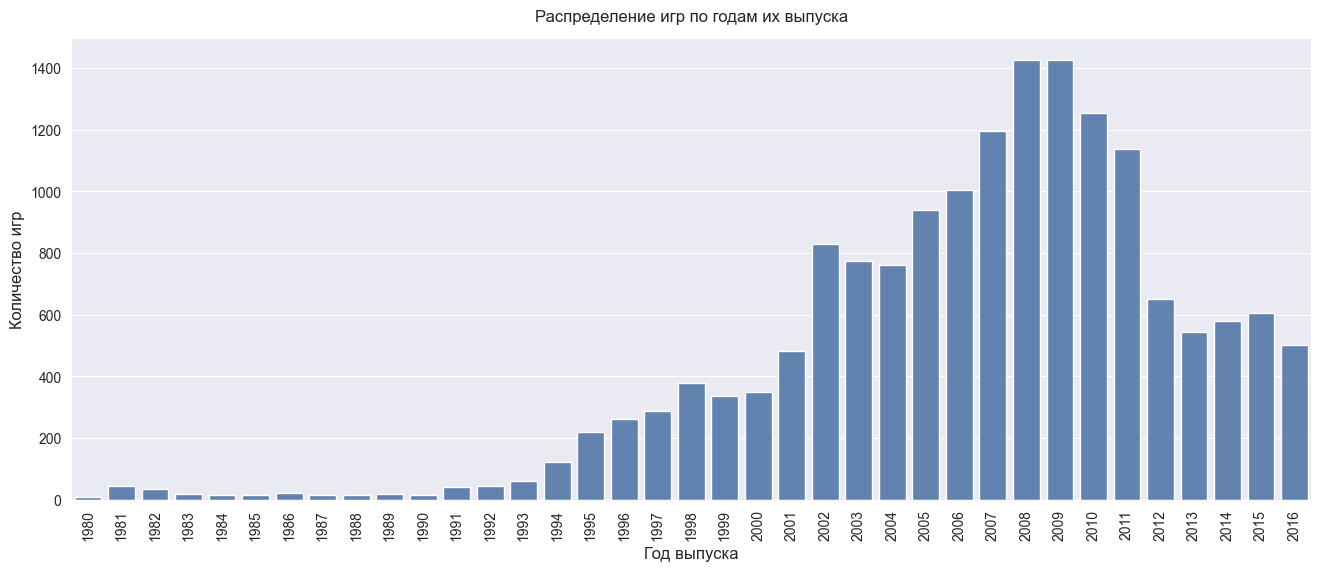

In [190]:
# Создаем график
plt.figure(figsize=(16, 6))

# Строим столбчатую диаграмму
ax = sns.barplot(
    x='year_of_release', 
    y='count', 
    color='#557fbd',
    data=games_per_year
)
# Добавляем подписи
ax.set_title('Распределение игр по годам их выпуска', fontdict={'fontsize':12}, pad=12)
ax.set_ylabel('Количество игр', fontsize=12)
ax.set_xlabel('Год выпуска', fontsize=12);

# Поворот подписей на оси x
plt.xticks(rotation=90)

# Отображение графика
plt.show()

Количество игр начало резко расти с 1990-х годов и достигло своего пика в 2008 году, после появления мобильных устройств на Android и iOS, количество игр на ПК и приставках начало резко сокращаться.

Для актуального анализа нам нужны данные только за период после спада количества игр, возьмём период с 2013 года.

### Как менялись продажи по платформам

Посмотрим как менялись продажи игр на различных платформах

Создадим датафрейм `total_sales_by_platform` с данными по суммарным продажам игр на каждой из платформ

In [191]:
# Создадим датафрейм с группировкой по 'platform' и применим агрегирующую функцию
total_sales_by_platform = df.groupby(['platform']).agg({
    'total_sales': 'sum'
}).sort_values(by='total_sales', ascending=False).reset_index()

# Выведем результат
total_sales_by_platform.head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Построим график распределения игровых платформ по суммарным продажам

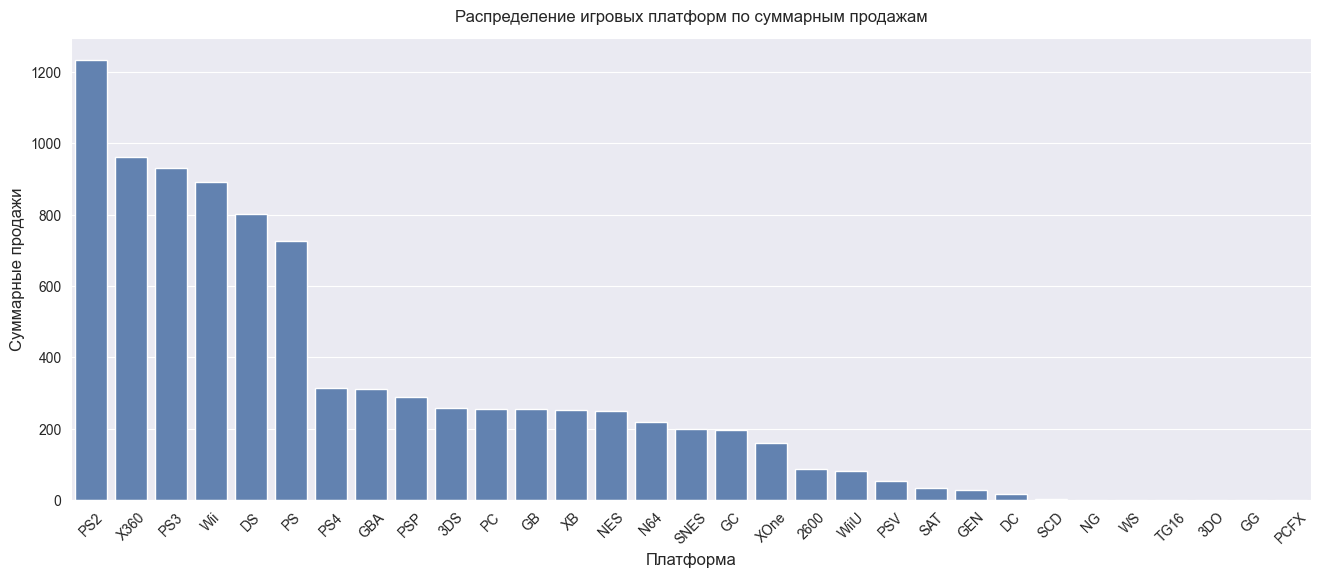

In [192]:
# Создаем график
plt.figure(figsize=(16, 6))

# Строим столбчатую диаграмму
ax = sns.barplot(
    x='platform', 
    y='total_sales', 
    color='#557fbd',
    data=total_sales_by_platform
)

# Добавляем подписи
ax.set_title('Распределение игровых платформ по суммарным продажам', fontdict={'fontsize':12}, pad=12)
ax.set_ylabel('Суммарные продажи', fontsize=12)
ax.set_xlabel('Платформа', fontsize=12);

# Поворот подписей на оси x
plt.xticks(rotation=45)

# Отображение графика
plt.show()

Сохраним названия топ-10 платформ с наибольшими суммарными продажами в переменную `top_platforms`

In [193]:
top_platforms = total_sales_by_platform['platform'].head(10).tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Создадим датафрейм `total_sales_of_games_by_year` с данными по суммарным продажам игр на каждой из платформ по годам

In [194]:
total_sales_of_games_by_year = df.groupby(['year_of_release','platform']).agg({
    'total_sales': 'sum'
}).reset_index()

# Выведем результат
total_sales_of_games_by_year.head()

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


Создадим датафрейм `df_top_platforms` с данными только для популярных платформ

In [195]:
df_top_platforms = total_sales_of_games_by_year[total_sales_of_games_by_year['platform'].isin(top_platforms)]

Построим график распределения суммарных продаж по годам и платформам

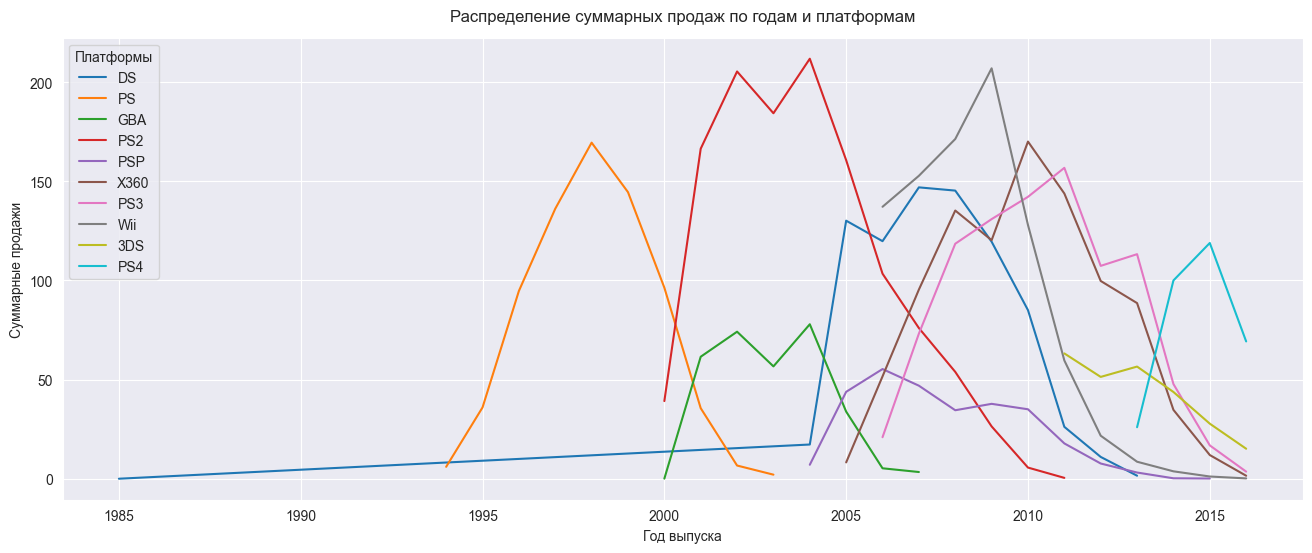

In [196]:
# Создаем график
plt.figure(figsize=(16, 6))

sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=df_top_platforms)

# Настройка заголовка и подписей осей
plt.title('Распределение суммарных продаж по годам и платформам', fontdict={'fontsize':12}, pad=12)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформы')

# Отображение графика
plt.show()

Обратим внимание на левый хвост графика распределения продаж платформы DS по годам и воспользуемся справочной информацией. Nintendo DS была выпущена в 2004 году в Канаде, США и Японии. Найдём записи с играми, которые выпущены для DS до 2004.

In [197]:
df.query('platform == "DS" and year_of_release<2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_ESRB,0.02


Удалим эту строку

In [198]:
df = df.drop(index=[15957]).reset_index(drop=True)

Посчитаем средний жизненный цикл игровых платформ

за весь период:

In [199]:
temp = df_top_platforms.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

11.0

за период с 1990 года

In [200]:
temp = df_top_platforms.query('year_of_release>1990').copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

10.5

Большинство игровых платформ имеют жизненный цикл продолжительностью около 10 лет.

### Возьмём данные за актуальный период

Для нашего исследования оставим только данные об играх, выпущенных после 2012 года

In [201]:
df_current = df.query('year_of_release>2012')

### Какие платформы лидируют по продажам, растут или падают?

Построим график распределения суммарных продаж по годам и платформам за 2013-2016 годы

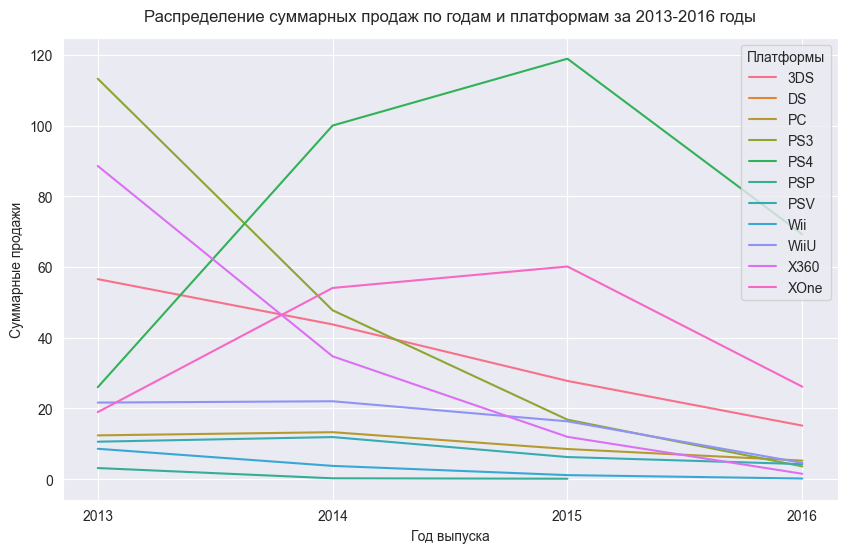

In [202]:
# Создаем график
plt.figure(figsize=(10, 6))

sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=total_sales_of_games_by_year.query('year_of_release>2012'))

# Настройка заголовка и подписей осей
plt.title('Распределение суммарных продаж по годам и платформам за 2013-2016 годы', fontdict={'fontsize':12}, pad=12)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформы')
plt.xticks(range(2013, 2017))

# Отображение графика
plt.show()

За период с 2013 по 2016 год по продажам лидируют PS4 и XBOX One. PS3, XBOX 360 на начало периода занимали большую долю продаж, но начали стремительно падать.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим диаграму

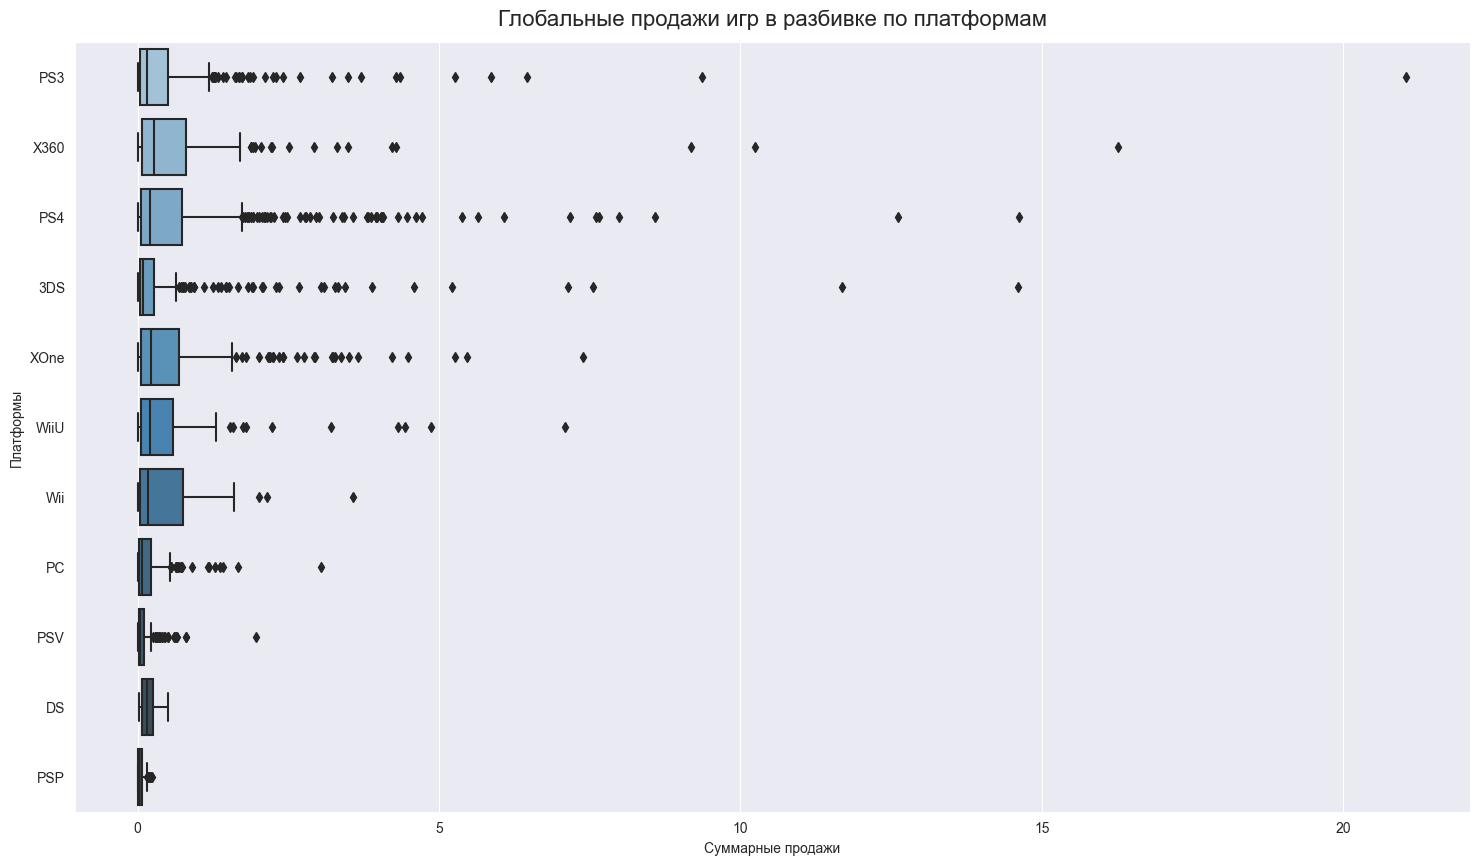

In [140]:
# Создаем график
plt.figure(figsize=(18, 10))

sns.boxplot(data=df_current, y='platform', x='total_sales', palette='Blues_d')

# Настройка заголовка и подписей осей
plt.title('Глобальные продажи игр в разбивке по платформам', fontdict={'fontsize':16}, pad=12)
plt.ylabel('Платформы')
plt.xlabel('Суммарные продажи')

# Отображение графика
plt.show()

Масштабируем нашу диаграмму, для этого выберем интервал от 0 до 2

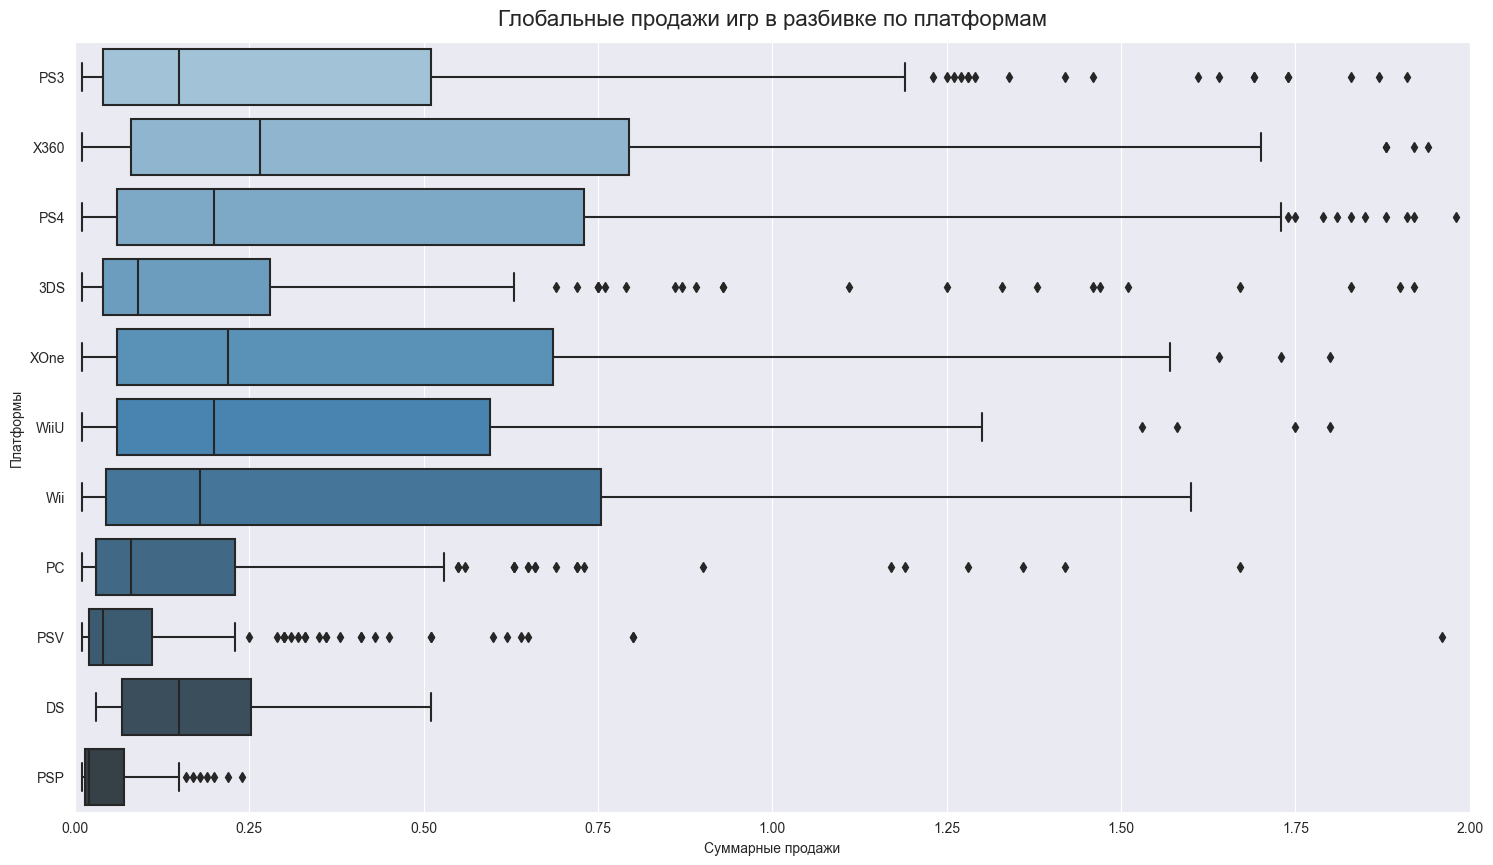

In [141]:
# Создаем график
plt.figure(figsize=(18, 10))

sns.boxplot(data=df_current, y='platform', x='total_sales', palette='Blues_d')

# Настройка заголовка и подписей осей
plt.title('Глобальные продажи игр в разбивке по платформам', fontdict={'fontsize':16}, pad=12)
plt.ylabel('Платформы')
plt.xlabel('Суммарные продажи')
plt.xlim(0, 2)
# Отображение графика
plt.show()

Платформа XBOX 360 имеет самые высокие медианные продажи на игру, что может свидетельствовать о стабильно более высоких продажах игр для этой платформы. За ней следом идут платформы: XBOX One, PS4, WiiU.  В то же время платформы PSP и PSV показывают наименьшие медианные продажи, что может указывать на меньшую популярность или меньшее количество высокопродаваемых игр для этих платформ.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Напишем функцию для построения диаграмм рассеяния и подсчёта корреляции

In [142]:
def pltcorr(platform):
    # Создание графика
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    
    titles = ['Корреляция между оценкой пользователей и продажами', 'Корреляция  между оценкой критиков и продажами']
    xlabels = ['Оценка', 'Оценка']
    ylabels = ['Суммарные продажи', 'Суммарные продажи']
    column_x = ['user_score', 'critic_score']
    column_y = 'total_sales'
        
    for column_x, ax, title, xlabel, ylabel in zip(column_x, axes.flatten()[:2], titles, xlabels, ylabels):        
        # Создадим датафрейм с группировкой по 'platform' и применим агрегирующую функцию
        df = df_current[df_current['platform']==platform]
        
        sns.scatterplot(x=column_x, y=column_y, data=df, color='#557fbd', ax=ax)
        
        # Настройка заголовка и подписей осей для каждого графика
        ax.set_title(title, fontdict={'fontsize':16}, pad=12)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Расчет коэффициента корреляции
        correlation = df[column_x].corr(df[column_y], method='pearson')
        
        if abs(correlation) <=0.3:
            cor = f'{title} - очень слабая: {correlation:.2f}'
        elif 0.3 < correlation <= 0.5:
            cor = f'{title} - слабая: {correlation:.2f}'
        elif 0.5 < correlation <= 0.7:
            cor = f'{title} - средняя: {correlation:.2f}'
        elif 0.7 < correlation <= 0.9:
            cor = f'{title} - высокая: {correlation:.2f}'
        elif 0.9 < correlation <= 1:
            cor = f'{title} - очень высокая: {correlation:.2f}'
        
        # Вывод коэффициента корреляции под графиком
        ax.text(0.5, -0.1, cor, 
                transform=ax.transAxes, ha='center', fontsize=16)
    
    # Общий заголовок для всех графиков
    fig.suptitle(platform, fontsize=18)
    
    # Отображение графика
    plt.tight_layout()
    plt.show()

Построим график и посчитаем корреляцию между оценками пользователей и продажами PS4

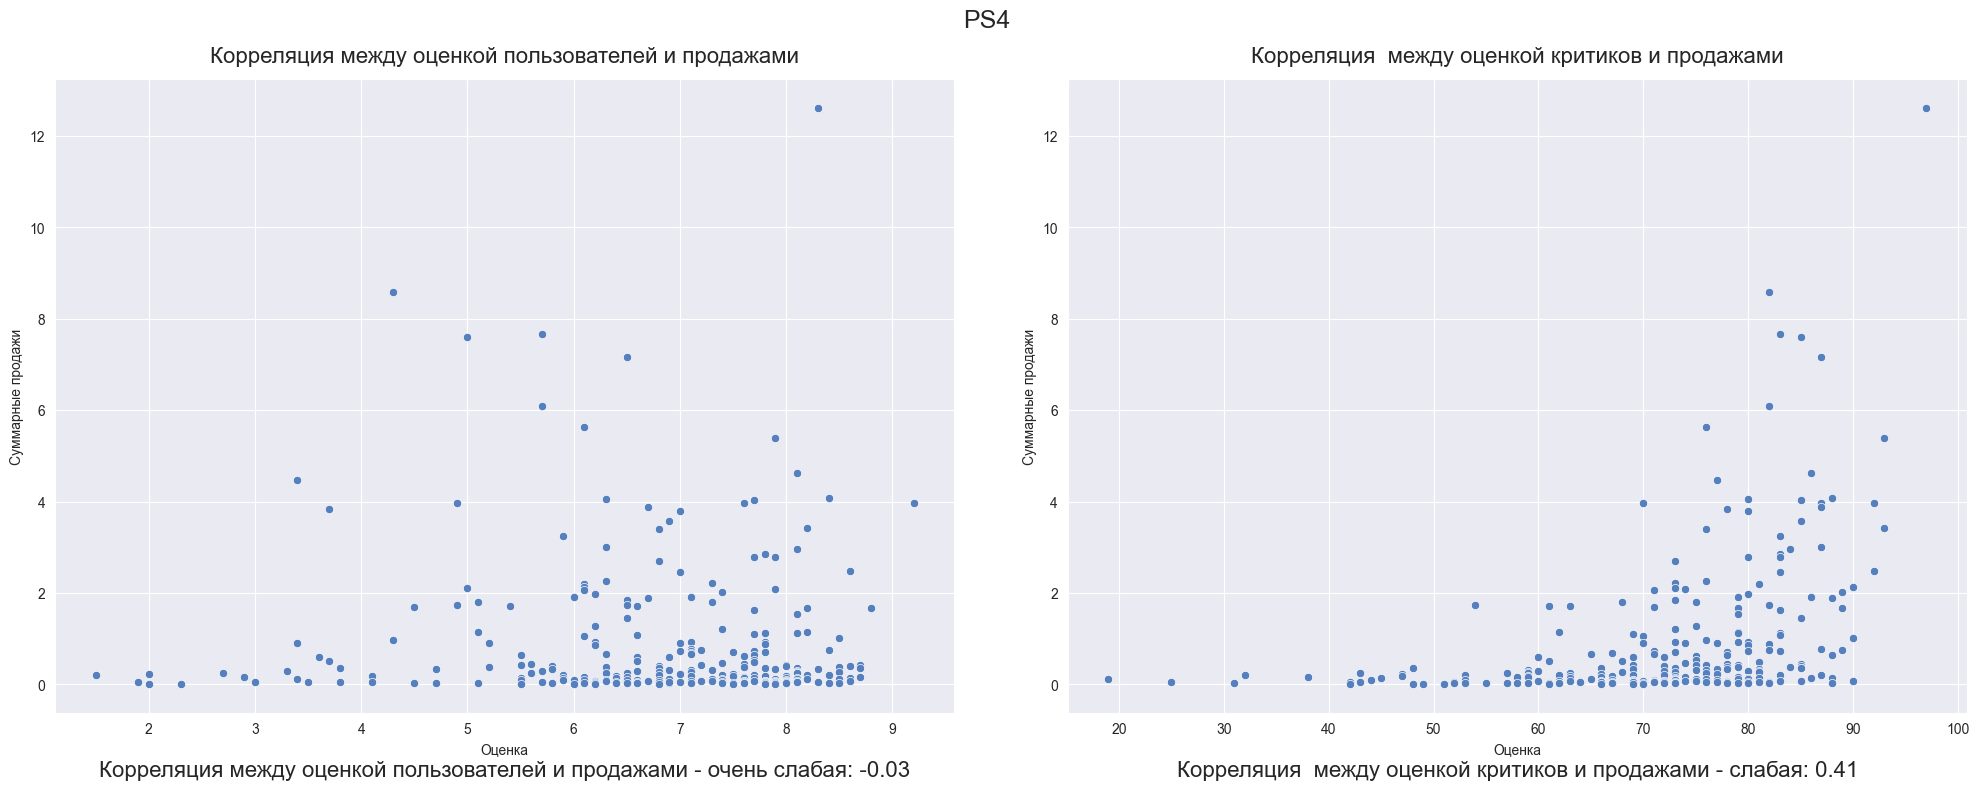

In [143]:
pltcorr('PS4')

Коэффициент корреляции -0.03 между оценкой пользователей `user_score` и общими продажами `total_sales` по шкале Чеддока указывает на очень слабую отрицательную связь. Это означает, что между оценками пользователей и общими продажами практически нет связи, и изменения в одной переменной не предсказывают изменений в другой. Таким образом, оценки пользователей не являются значимым индикатором продаж игр.

Коэффициент корреляции 0.41 между оценкой критиков `critic_score` и общими продажами `total_sales` указывает на слабую связь. Это означает, что хотя между оценками критиков и продажами существует положительная корреляция, она не является достаточно сильной, чтобы утверждать о тесной взаимосвязи между этими двумя переменными. Следовательно, другие факторы, помимо оценок критиков, также могут играть значительную роль в общих продажах игр.

### Соотнесём выводы с продажами игр на других платформах.

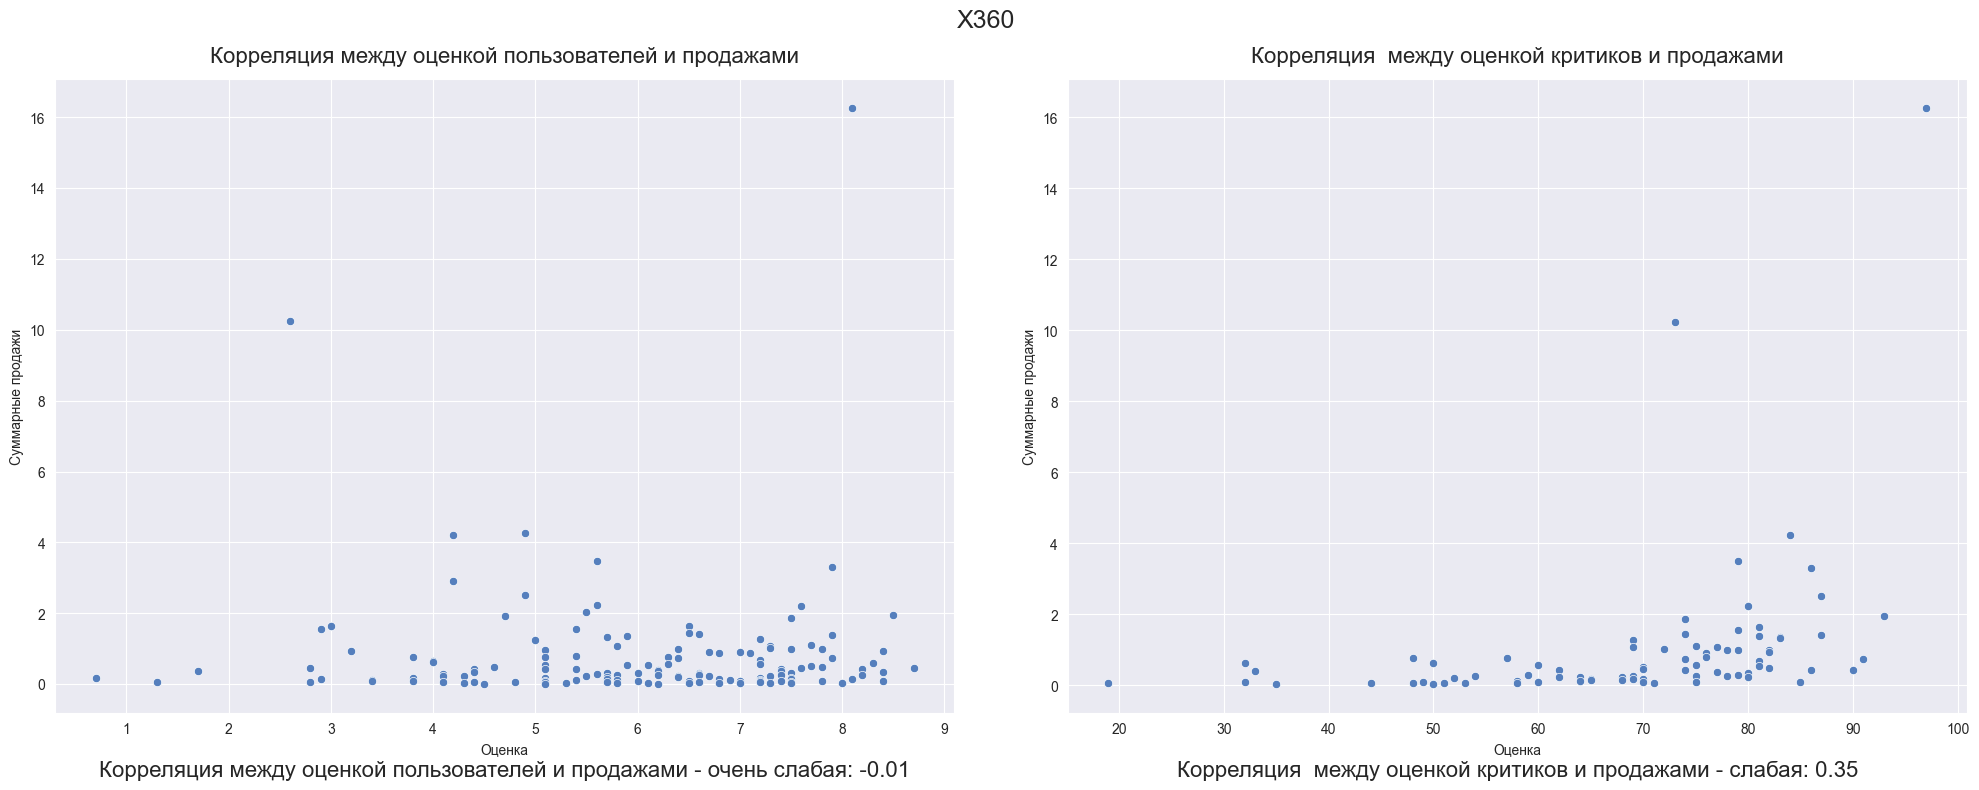

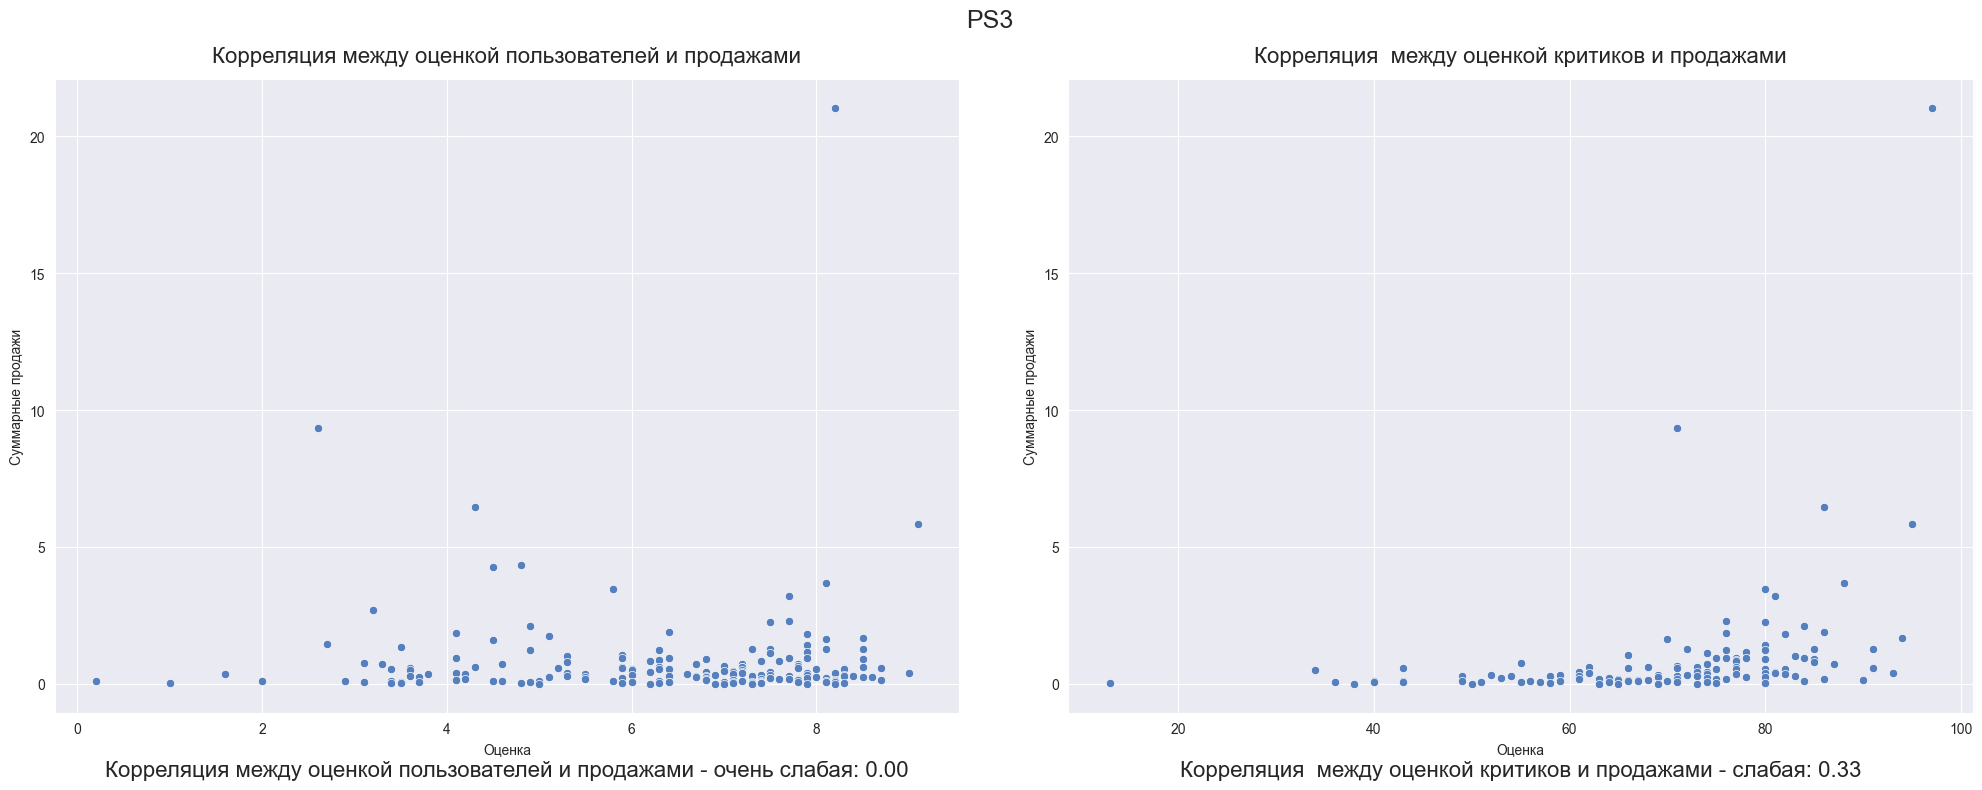

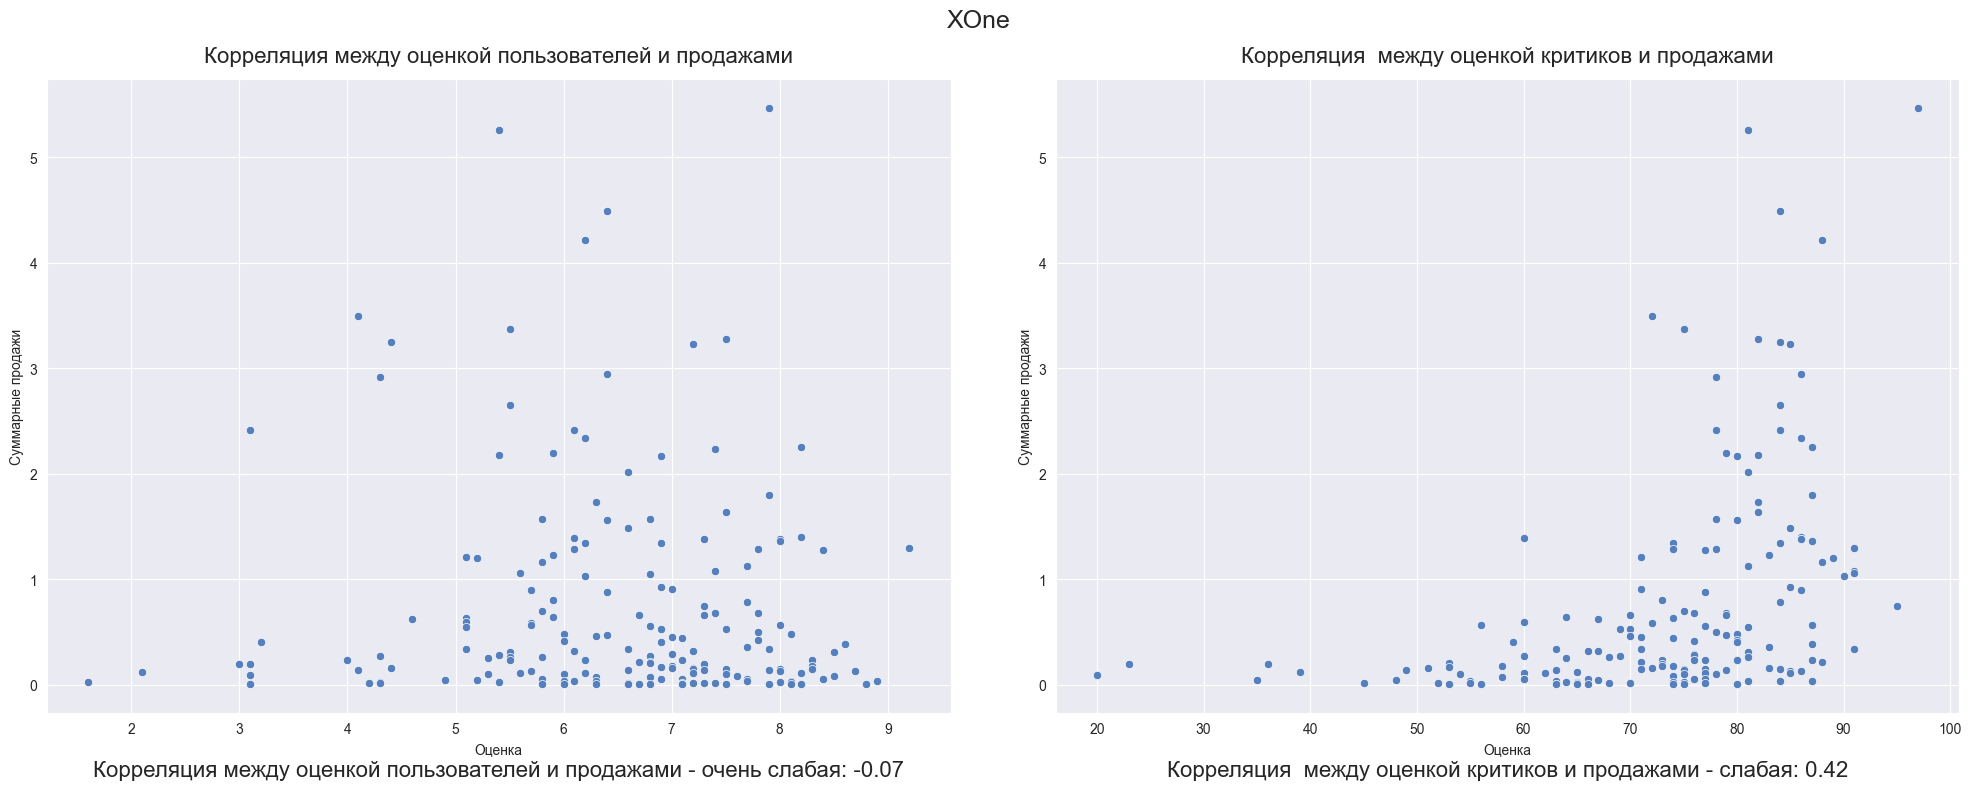

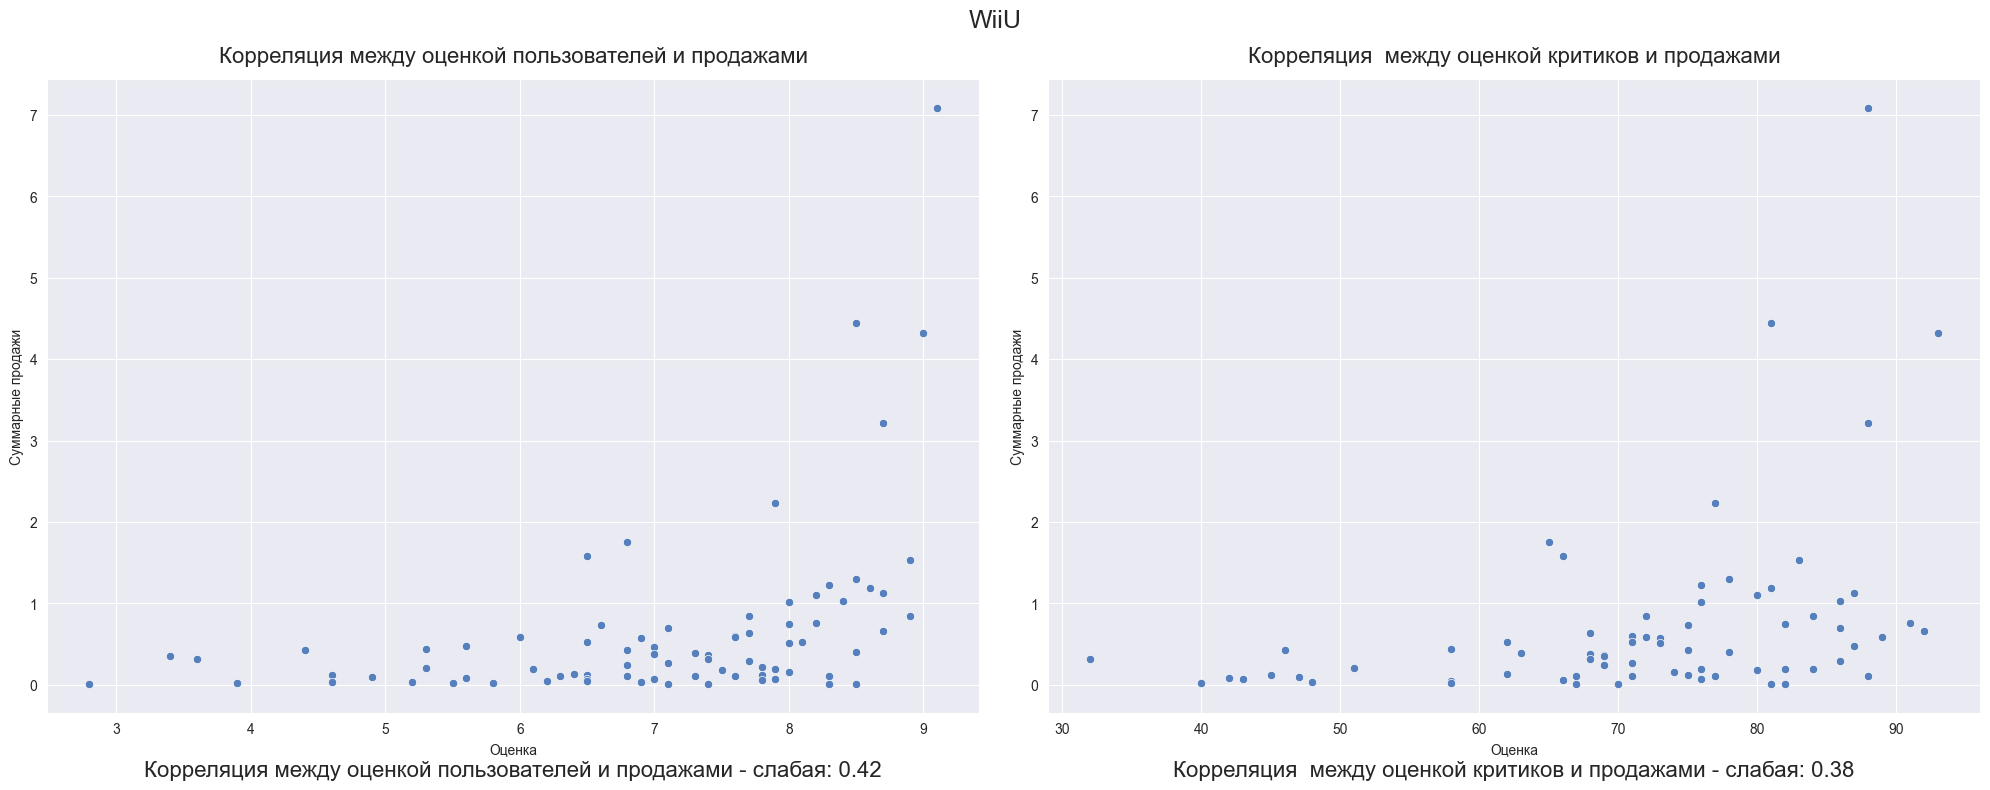

In [144]:
# Выведем графики для других популярных платформ, кроме PS4
platforms = ['X360','PS3','XOne','WiiU'] 
for platform in platforms:
    pltcorr(platform)

Cуществует слабая корреляция между оценками критиков и объемами продаж для большинства игровых платформ. Это указывает на то, что высокие оценки критиков часто сопровождаются увеличением продаж игр. В то же время, связь между оценками пользователей и продажами в большинстве случаев оказалась значительно слабее, что может свидетельствовать о меньшем влиянии пользовательских рейтингов на коммерческий успех игр.

### Посмотрим на общее распределение игр по жанрам. Какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?

In [145]:
# Группировка данных по жанру и суммирование прибыли и отсортируем по убыванию
total_sales_by_genre = df_current.groupby(['genre']).agg({
    'total_sales': 'sum'
}).sort_values(by='total_sales', ascending=False).reset_index()
total_sales_by_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


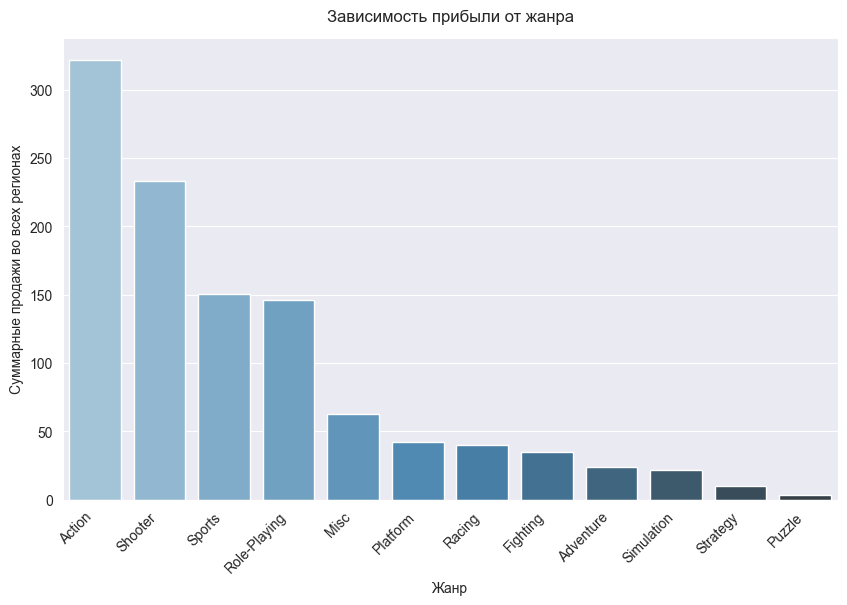

In [146]:
# Создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='total_sales', data=total_sales_by_genre, palette='Blues_d')

# Настройка заголовка и подписей осей
plt.title('Зависимость прибыли от жанра', fontdict={'fontsize':12}, pad=12)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи во всех регионах')

# Поворот подписей по оси x для лучшей читаемости
plt.xticks(rotation=45, ha='right')

# Отображение графика
plt.show()

Сравним медианные значения

In [147]:
# Группировка данных по жанру и суммирование прибыли и отсортируем по убыванию
total_sales_by_genre_m = df_current.groupby(['genre']).agg({
    'total_sales': 'median'
}).sort_values(by='total_sales', ascending=False).reset_index()
total_sales_by_genre_m

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


Построим диаграмму размаха

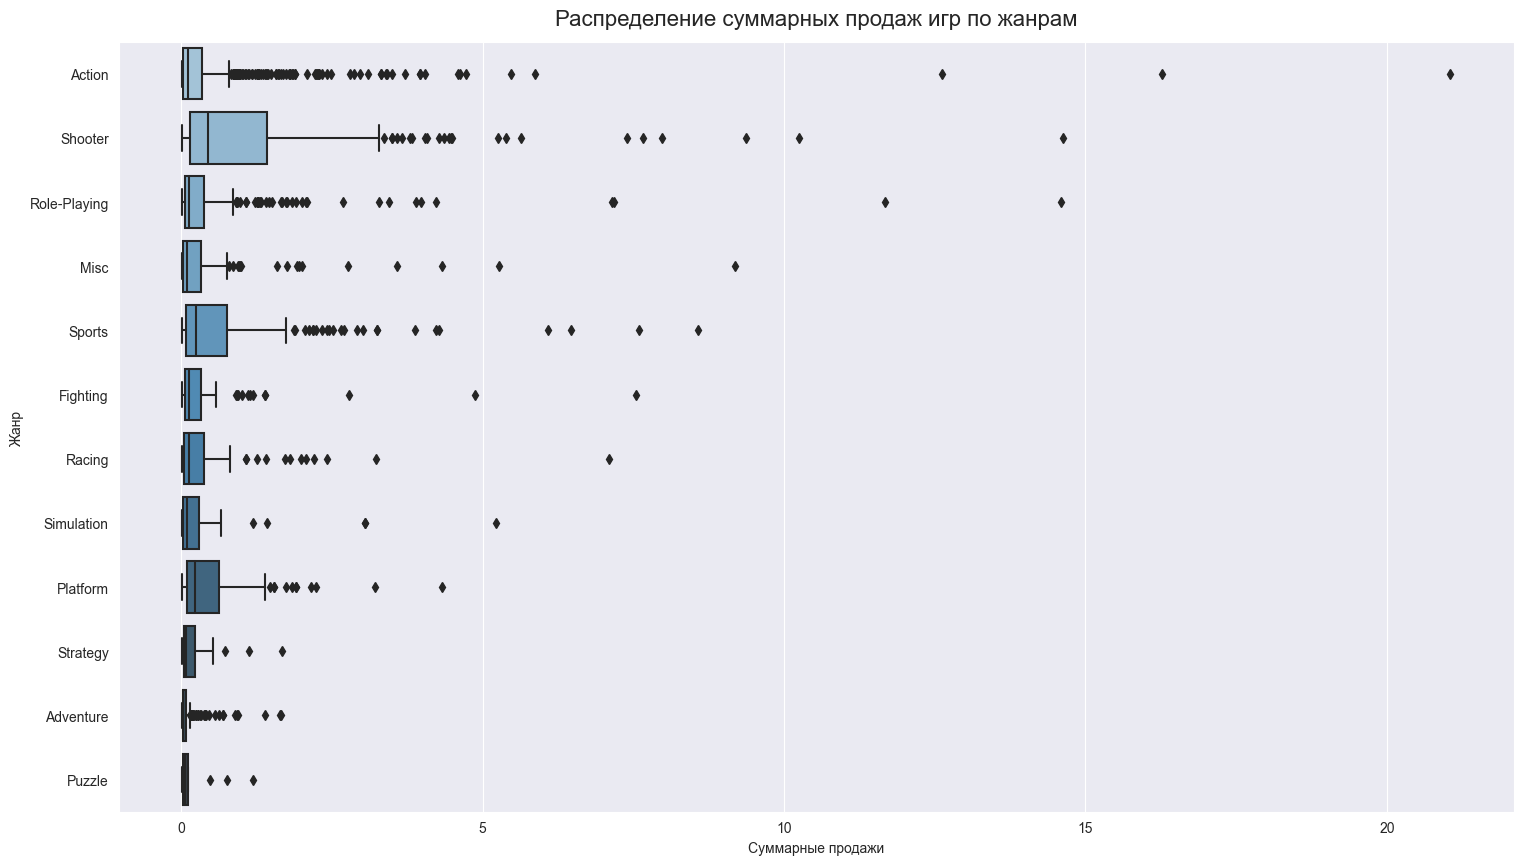

In [148]:
# Создаем график
plt.figure(figsize=(18, 10))

sns.boxplot(data=df_current, y='genre', x='total_sales', palette='Blues_d')

# Настройка заголовка и подписей осей
plt.title('Распределение суммарных продаж игр по жанрам', fontdict={'fontsize':16}, pad=12)
plt.ylabel('Жанр')
plt.xlabel('Суммарные продажи')

# Отображение графика
plt.show()

Масштабируем нашу диаграмму, для этого выберем интервал от 0 до 3.5

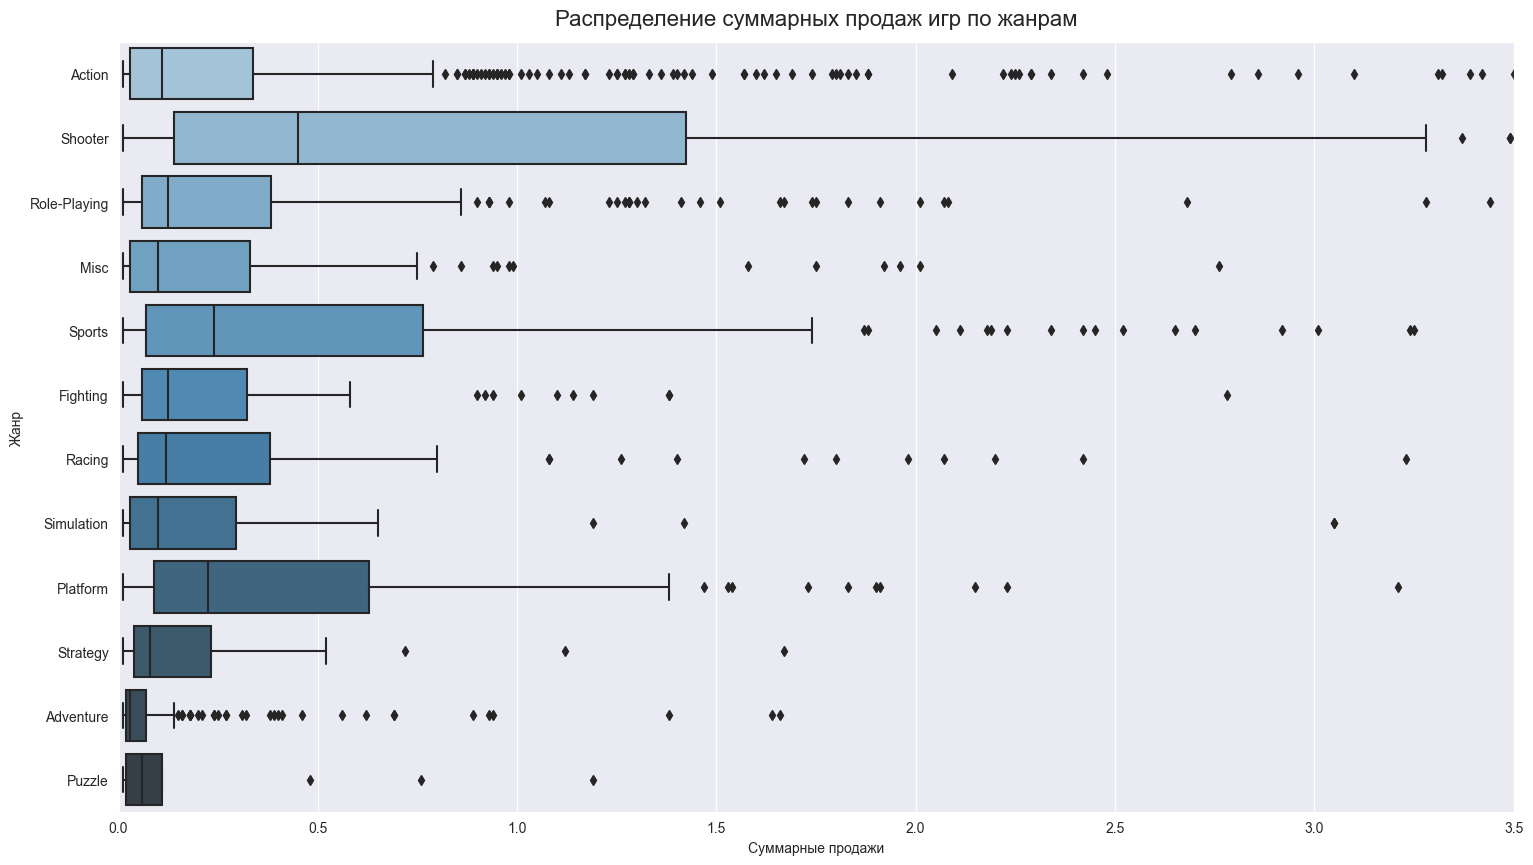

In [149]:
# Создаем график
plt.figure(figsize=(18, 10))

sns.boxplot(data=df_current, y='genre', x='total_sales', palette='Blues_d')

# Настройка заголовка и подписей осей
plt.title('Распределение суммарных продаж игр по жанрам', fontdict={'fontsize':16}, pad=12)
plt.ylabel('Жанр')
plt.xlabel('Суммарные продажи')
plt.xlim(0, 3.5)

# Отображение графика
plt.show()

Несмотря на то что жанр Action имеет самые высокие суммарные продажи, игры жанров Shooter, Sports, Platform по медиане приносят больше прибыли на одну игру. Таким образом, если рассматривать прибыльность отдельных игр, то жанр Shooter является наиболее прибыльным. А игры жанров Adventure, Strategy и Puzzle по медиане приносят меньше прибыли на одну игру.

Наблюдается тенденция в индустрии видеоигр: с 1990-х годов количество выпущенных игр стремительно возросло, достигнув пика в 2008 году. Однако с появлением мобильных устройств на платформах Android и iOS, рынок игр для ПК и консолей испытал заметное сокращение. В свете этих изменений, для современного анализа рынка целесообразно сосредоточиться на данных, начиная с 2013 года — периода после упомянутого спада.

Игровые платформы, как правило, проходят жизненный цикл в среднем за десять лет. В числе лидеров рынка — консоли Play Station (PS, PS2, PS3, PS4, PSP) и XBOX. Компании Sony и Microsoft, сталкиваясь со спадом популярности предыдущих моделей, успешно запускают новые версии, что приводит к резкому росту продаж. Игры для ПК, хотя и не пользуются такой же высокой популярностью, тем не менее, сохраняют своё присутствие на рынке на протяжении всего исследуемого периода.

За период с 2013 по 2016 год по продажам лидируют PS4 и XBOX One. PS3, XBOX 360 на начало периода занимали большую долю продаж, но начали стремительно падать.

Cуществует слабая корреляция между оценками критиков и объемами продаж для большинства игровых платформ. Это указывает на то, что высокие оценки критиков часто сопровождаются увеличением продаж игр. В то же время, связь между оценками пользователей и продажами в большинстве случаев оказалась значительно слабее, что может свидетельствовать о меньшем влиянии пользовательских рейтингов на коммерческий успех игр.

Несмотря на то что жанр Action имеет самые высокие суммарные продажи, игры жанров Shooter, Sports, Platform по медиане приносят больше прибыли на одну игру. Таким образом, если рассматривать прибыльность отдельных игр, то жанр Shooter является наиболее прибыльным. А игры жанров Adventure, Strategy и Puzzle по медиане приносят меньше прибыли на одну игру.

## Составим портрет пользователя каждого региона

Напишем функцию для вывода ТОП-5 платформ, жанров и рейтингов в различных регионах

<font color='Blue'><b>Переписал функцию, чтобы для каждого региона выводила индивидуальный ТОП-5 и строила круговые диаграммы. Использовал датасет по актуальному периоду без фильтрации</b></font>

Напишем функцию для разбивки данных на ТОП-5 + "другие" и построения графиков

In [150]:
def plot_pie_chart():
    # Создание графика
    fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(aspect="equal"))
    
    # Заголовки для каждого графика
    titles = ['Топ 5 платформ', 'Топ 5 жанров', 'Топ 5 рейтингов']    
    columns = ['platform', 'genre', 'rating']    
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    
    # Подзаголовки для каждой строки
    subtitles = ['Северная Америка', 'Европа', 'Япония']
    
    for i, region in enumerate(regions):
        # Добавление подзаголовка для каждой строки
        fig.text(0.5, 1-(i*0.33), subtitles[i], ha='center', va='center', fontsize=16, transform=fig.transFigure)
        
        for j, (title, column) in enumerate(zip(titles, columns)): 
            # Подготовка данных для регионов
            # Группировка и суммирование продаж
            sales = df_current.groupby(column)[region].sum().sort_values(ascending=False)    
            # Получение топ-5
            top = sales.head(5)    
            # Суммирование продаж всех остальных
            other = sales[5:].sum()    
            # Добавление категории 'Другое'
            top['Other'] = other
            
            # Построение круговых диаграмм для каждого региона            
            colors = sns.color_palette('Blues_d')
            axs[i, j].pie(top, labels=top.index, autopct='%1.1f%%', startangle=140, colors=colors)
            axs[i, j].set_title(title, fontdict={'fontsize':12}, pad=12)
    
    # Отображение графика
    plt.tight_layout()
    plt.show()

Выполним эту функцию

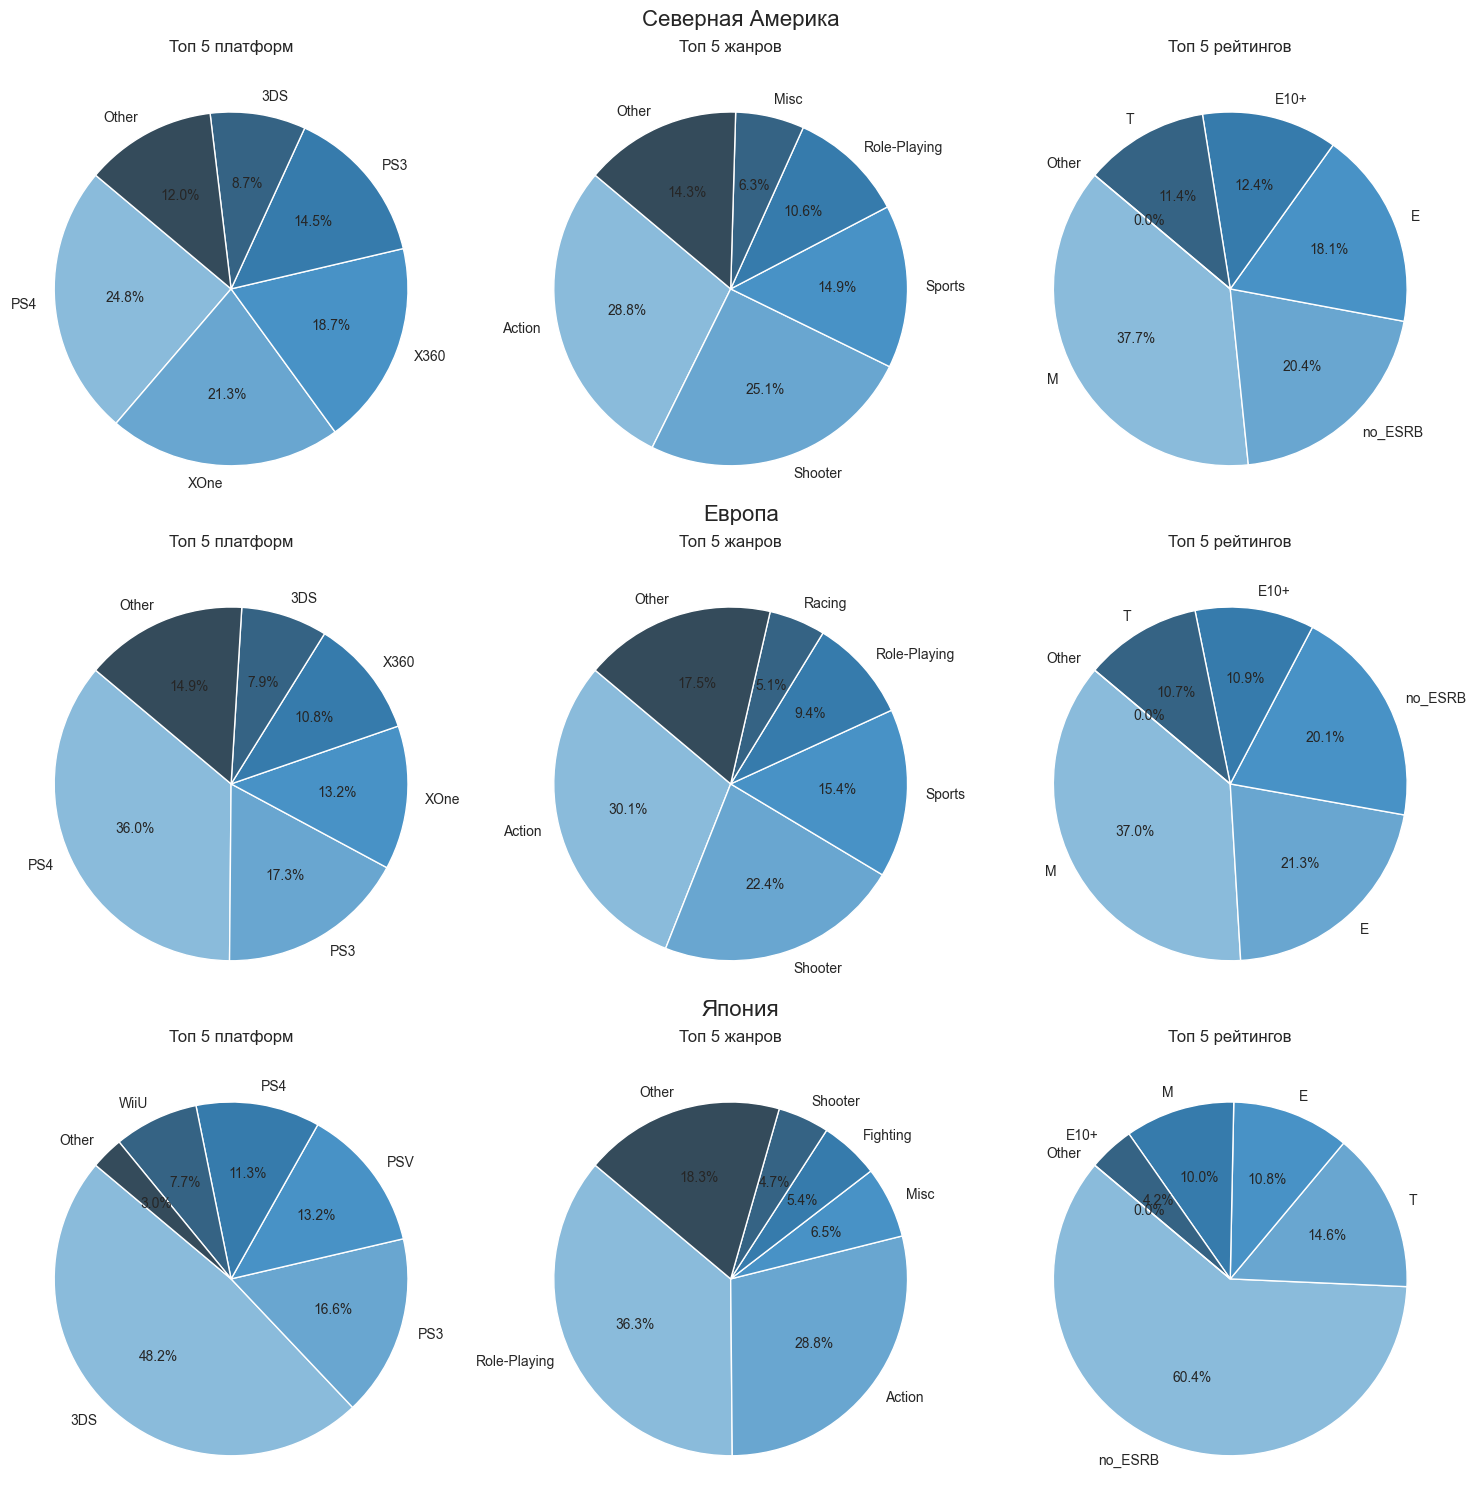

In [151]:
plot_pie_chart()

**Доли продаж на платформах:**
- В Северной Америке игры для PS4 и XOne являются самыми популярными с продажами 108.74 и 93.12 миллионов соответственно.
- В Европе игры для PS4 значительно опережает XOne с продажами 141.09 против 51.59 миллионов.
- В Японии игры для 3DS являются доминирующими с продажами 67.81 миллионов, в то время как игры для PS4 имеют только 15.96 миллионов продаж.

**Разница в популярных жанрах:**
- В Северной Америке жанры Action и Shooter являются самыми популярными с продажами 126.05 и 109.74 миллионов соответственно.
- В Европе также преобладает жанр Action с продажами 118.13 миллионов, но Shooter имеет меньше продаж, чем в Северной Америке, с 87.86 миллионами.
- В Японии жанр Role-Playing является самым популярным с продажами 51.04 миллионов, что значительно выше, чем у жанра Action с 40.49 миллионами.

**Влияние рейтинга ESRB на продажи:**
- В Северной Америке игры с рейтингом M имеют самые высокие продажи с 165.21 миллионами.
- В Европе также игры с рейтингом M лидируют с 145.32 миллионами продаж.
- В Японии большинство продаж приходится на игры без рейтинга, что указывает на 85.05 миллионов продаж, в то время как игры с рейтингом M имеют только 14.11 миллионов продаж.

Эти данные показывают, что предпочтения пользователей в разных регионах могут значительно отличаться, и что рейтинг ESRB оказывает влияние на продажи игр в Северной Америке, где игры для взрослых (M) являются наиболее популярными. В Японии же большая часть продаж приходится на игры без рейтинга, в Европе в ТОП-5 20% игр без рейтинга, что может быть связано с тем, что этим рейтингом маркируются игры для Северной Америки а в этих регионах есть свои рейтинги, на которые и ориентируются покупатели.

## Проверим гипотезы

Выберем уровень статистической значимости равный 1%

In [152]:
alpha = 0.01

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:
* $H_0$ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
* $H_1$ - cредние пользовательские рейтинги платформ Xbox One и PC разные

Запишем в датафрейм `xone` данные по Xbox One и в датафрейм `pc` данные по PC 

In [153]:
xone = df.query('platform in "XOne" and year_of_release>2012')
pc = df.query('platform in "PC" and year_of_release>2012')

Для проверки этих гипотез применим двухвыборочный t-тест для независимых выборок. Этот критерий используется для сравнения средних значений двух разных групп. Выбор именно этого теста обусловлен следующими причинами:
* выборки независимы, то есть результаты одной группы не влияют на результаты другой.
* t-тест является одним из наиболее распространённых методов для определения различий между средними двух групп
* данные имеют нормальное распределение, что является одним из условий применения t-теста
* параметр nan_policy='omit' позволяет корректно обработать данные, содержащие значения NaN, исключая их из анализа
* если p-value, полученное в результате теста, меньше заданного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной. Это указывает на то, что различия между группами статистически значимы. Если p-value больше уровня значимости, то у нас нет оснований отвергать нулевую гипотезу, и мы не можем утверждать о наличии значимых различий между средними рейтингами.

Используем исходные данные о пользовательских рейтингах — отдельно для Xbox One и для PC.

In [154]:
results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], 
    nan_policy='omit')
print(f"p-value: {results.pvalue}")

p-value: 0.14012658403611503


Вывод об отвержении или неотвержении нулевой гипотезы

In [155]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств, что средние пользовательские рейтинги платформ различаются.")

Не отвергаем нулевую гипотезу: нет достаточных доказательств, что средние пользовательские рейтинги платформ различаются.


Посчитаем средние пользовательские рейтинги

In [156]:
print(f"Сердний пользовательский рейтинг для Xbox One: {xone['user_score'].mean().round(2)}, для PC: {pc['user_score'].mean().round(2)}")

Сердний пользовательский рейтинг для Xbox One: 6.52, для PC: 6.27


Так как p-value больше заданного уровня значимости, у нас нет достаточных оснований для отклонения нулевой гипотезы. Это означает, что на основе имеющихся данных мы не можем утверждать, что существует статистически значимое различие между средними пользовательскими рейтингами для платформ Xbox One и PC. Следовательно, данные не подтверждают наличие различий между средними рейтингами этих платформ, несмотря на небольшую разницу в средних значениях (6.52 для Xbox One против 6.27 для PC).

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:
* $H_0$ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
* $H_1$ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Запишем в датафрейм `action` данные по жанру Action и в датафрейм `sports` данные по жанру Sports

In [157]:
action = df.query('genre in "Action" and year_of_release>2012')
sports = df.query('genre in "Sports" and year_of_release>2012')

Применим двухвыборочный t-тест для независимых выборок. Используем исходные данные о пользовательских рейтингах — отдельно для Action и для Sports.

In [158]:
results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], 
    nan_policy='omit')
print(f"p-value: {results.pvalue}")

p-value: 1.0517832389139422e-27


Вывод об отвержении или неотвержении нулевой гипотезы

In [159]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств, что средние пользовательские рейтинги жанров Action и Sports различаются.")

Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


Посчитаем средние пользовательские рейтинги

In [160]:
print(f"Сердний пользовательский рейтинг для жанра Action: {action['user_score'].mean().round(2)}, для жанра Sports: {sports['user_score'].mean().round(2)}")

Сердний пользовательский рейтинг для жанра Action: 6.84, для жанра Sports: 5.24


На имеющихся данных, при уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.  С учетом средних рейтингов, которые составляют 6.84 для жанра Action и 5.24 для жанра Sports, можно заключить, что жанр Action в среднем имеет более высокую оценку пользователей по сравнению с жанром Sports.

## Общий вывод

В ходе анализа наших данных мы выявили ряд ключевых особенностей и приняли важные решения по предобработке информации:

- Датасет охватывает **16,715 записей**, представляющих игры, выпущенные в период с **1980 по 2016 год**.
- Названия столбцов были стандартизированы до нижнего регистра.
- Данные в столбце `year_of_release` были приведены к целочисленному типу, чтобы упростить их анализ и восприятие.
- Значения "tbd" в столбце `user_score`, обозначающие отсутствие определенной оценки, были заменены на NaN, а сам столбец был преобразован в вещественный тип для возможности проведения количественных анализов.
- Было подтверждено отсутствие дубликатов в строках, что гарантирует уникальность каждой записи.
- Пропущенные значения в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating` были оставлены без изменений, чтобы избежать потенциального искажения результатов исследования. Эти пропуски могут быть связаны с различными причинами, включая технические сбои при сборе данных или их первоначальное отсутствие, как, например, рейтинг ESRB для игр, выпущенных до 1994 года.

Основываясь на проведенном анализе, можно дать следующие рекомендации для эффективного использования рекламного бюджета:

**Платформы**: Северная Америка и Европа являются наиболее перспективными регионами для рекламы игр на PS4 и XBOX One. В Японии стоит рассмотреть возможность рекламы игр для 3DS.

**Жанры**: Для продвижения в Северной Америке и Европе, лучше выбрать жанр Shooter, а в Японии лучше продвигать игры жанра Role-Playing.

**Рейтинг ESRB**: Игры с рейтингом M (для взрослых) имеют самые высокие продажи в Северной Америке и Европе. В Японии большая часть продаж приходится на игры без рейтинга, что может быть связано с особенностями местного рынка.

**Отзывы**: Отзывы критиков имеют слабую корреляцию с продажами, что указывает на то, что высокие оценки критиков могут способствовать увеличению продаж. Отзывы пользователей имеют меньшую корреляцию с продажами, поэтому их влияние на коммерческий успех игр может быть ограниченным.

In [3]:
import pandas as pd

ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
ferma_main.name = 'ferma_main'

ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)': 'EFU',
    'Сырой протеин, г': 'crude_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'SPR',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat',
    'Белок,%': 'protein',
    'Вкус молока': 'milk',
    'Возраст': 'age'
}, inplace=True)


In [4]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное')

In [ ]:


Построй с помощью python для столбцов n_columns = ['milk_yield','EFU','crude_protein','SPR','fat','protein'] датафрейма ferma_mainс количественными параметрами : 
подходящие им графики, расположи их 3x2

качественные: q_columns = ['breed','pasture_type','sire_breed','milk','age']